# **1. Importing Libraries**

In [7]:
import os

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten,Conv2D,Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import load_img, img_to_array

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
from PIL import Image

# **2. Data Gathering**

In [8]:
train_data = "/kaggle/input/intel-image-classification/seg_train/seg_train"
test_data = "/kaggle/input/intel-image-classification/seg_test/seg_test"

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
training_set = train_datagen.flow_from_directory('/kaggle/input/intel-image-classification/seg_train/seg_train', 
                                                    target_size = (64, 64), 
                                                    batch_size = 32)
test_set = test_datagen.flow_from_directory('/kaggle/input/intel-image-classification/seg_test/seg_test',
                                                target_size = (64, 64),
                                                 batch_size = 32)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


# **3. EDA**

## **1. Finding Dataset variation**

In [11]:
catagories = os.listdir(train_data)
train_mountain_count = 0
train_buildings_count = 0
train_forest_count = 0
train_glacier_count = 0
train_sea_count = 0
train_street_count = 0
test_mountain_count = 0
test_buildings_count = 0
test_forest_count = 0
test_glacier_count = 0
test_sea_count = 0
test_street_count = 0

In [12]:
pred_data_count = 0
for i in os.scandir("/kaggle/input/intel-image-classification/seg_train/seg_train/mountain"):
    if i.is_file():
        train_mountain_count +=1

for i in os.scandir("/kaggle/input/intel-image-classification/seg_train/seg_train/buildings"):
    if i.is_file():
        train_buildings_count +=1

for i in os.scandir("/kaggle/input/intel-image-classification/seg_train/seg_train/forest"):
    if i.is_file():
        train_forest_count +=1

for i in os.scandir("/kaggle/input/intel-image-classification/seg_train/seg_train/glacier"):
    if i.is_file():
        train_glacier_count +=1

for i in os.scandir("/kaggle/input/intel-image-classification/seg_train/seg_train/sea"):
    if i.is_file():
        train_sea_count +=1
        
for i in os.scandir("/kaggle/input/intel-image-classification/seg_train/seg_train/street"):
    if i.is_file():
        train_street_count +=1
        
for i in os.scandir("/kaggle/input/intel-image-classification/seg_test/seg_test/mountain"):
    if i.is_file():
        test_mountain_count +=1

for i in os.scandir("/kaggle/input/intel-image-classification/seg_test/seg_test/buildings"):
    if i.is_file():
        test_buildings_count +=1

for i in os.scandir("/kaggle/input/intel-image-classification/seg_test/seg_test/forest"):
    if i.is_file():
        test_forest_count +=1

for i in os.scandir("/kaggle/input/intel-image-classification/seg_test/seg_test/glacier"):
    if i.is_file():
        test_glacier_count +=1

for i in os.scandir("/kaggle/input/intel-image-classification/seg_test/seg_test/sea"):
    if i.is_file():
        test_sea_count +=1
        
for i in os.scandir("/kaggle/input/intel-image-classification/seg_test/seg_test/street"):
    if i.is_file():
        test_street_count +=1
for i in os.scandir("/kaggle/input/intel-image-classification/seg_pred/seg_pred"):
    if i.is_file():
        pred_data_count +=1


In [13]:
train_data_qty = {
    "mountain" : train_mountain_count, 
    "buildings" : train_buildings_count,
    "forest" : train_forest_count,
    "glacier" : train_glacier_count,
    "seat" : train_sea_count,
    "street" : train_street_count  
}
test_data_qty = {
    "mountain" : test_mountain_count, 
    "buildings" : test_buildings_count,
    "forest" : test_forest_count,
    "glacier" : test_glacier_count,
    "seat" : test_sea_count,
    "street" : test_street_count  
}
print(test_data_qty)
print(train_data_qty)
print(pred_data_count)

{'mountain': 525, 'buildings': 437, 'forest': 474, 'glacier': 553, 'seat': 510, 'street': 501}
{'mountain': 2512, 'buildings': 2191, 'forest': 2271, 'glacier': 2404, 'seat': 2274, 'street': 2382}
7301


# **4. Model creation**

**1. Creating Model**

In [14]:
X_model=Sequential()

X_model.add(
    Convolution2D(32,(3,3),
    input_shape=(64,64,3),
    activation="relu")
)
X_model.add(MaxPooling2D(pool_size=(2,2)))
X_model.add(Flatten())
X_model.add(Dense(3000,activation="relu"))
X_model.add(Dense(units=6,activation="softmax"))

In [15]:
X_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 3000)              92259000  
                                                                 
 dense_1 (Dense)             (None, 6)                 18006     
                                                                 
Total params: 92,277,902
Trainable params: 92,277,902
Non-trainable params: 0
____________________________________________

**2. Compiling Model**

In [16]:
X_model.compile(optimizer= "adam", loss= "categorical_crossentropy", metrics= ["accuracy"])

**3. Fitting Model**

In [17]:
fit_model = X_model.fit(
    training_set,
    steps_per_epoch = 100,
    epochs = 20,
    validation_data = test_set,
    validation_steps = 100
)

Epoch 1/20
100/100 [==============================] - 51s 419ms/step - loss: 1.6405 - accuracy: 0.4975 - val_loss: 1.1387 - val_accuracy: 0.6187
Epoch 2/20
100/100 [==============================] - 20s 196ms/step - loss: 0.9718 - accuracy: 0.6274
Epoch 3/20
100/100 [==============================] - 17s 167ms/step - loss: 0.8709 - accuracy: 0.6908
Epoch 4/20
100/100 [==============================] - 14s 144ms/step - loss: 0.8368 - accuracy: 0.6903
Epoch 5/20
100/100 [==============================] - 13s 127ms/step - loss: 0.8456 - accuracy: 0.6916
Epoch 6/20
100/100 [==============================] - 12s 124ms/step - loss: 0.7900 - accuracy: 0.7075
Epoch 7/20
100/100 [==============================] - 11s 111ms/step - loss: 0.7692 - accuracy: 0.7206
Epoch 8/20
100/100 [==============================] - 11s 112ms/step - loss: 0.7481 - accuracy: 0.7213
Epoch 9/20
100/100 [==============================] - 10s 98ms/step - loss: 0.7280 - accuracy: 0.7300
Epoch 10/20
100/100 [===========

# **5. Model Evaluation**

In [18]:
x_model_evaluation = X_model.evaluate(test_set)

94/94 [==============================] - 4s 41ms/step - loss: 0.7311 - accuracy: 0.7460


In [19]:
print(f"Model Accuracy :", x_model_evaluation[1])
print(f"Model Loss :", x_model_evaluation[0])

Model Accuracy : 0.7459999918937683
Model Loss : 0.7311278581619263


**1. Plotting Graph of Accuracy and Loss**

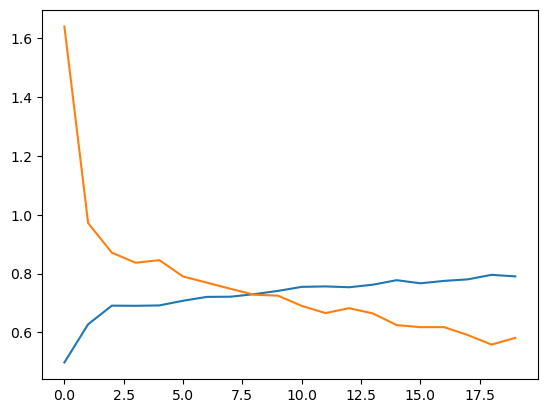

In [20]:
plt.plot([i for i in range(20)],fit_model.history["accuracy"])
plt.plot([i for i in range(20)],fit_model.history["loss"])

# **6. Saving Model**

In [21]:
X_model.save('path/to/save/X_model.h5')

# **7. Hyper parameter tuning**

**1. Setting Directory**

In [22]:
train_images_directory = "/kaggle/input/intel-image-classification/seg_train/seg_train"

**2. Catagorising Dataset**

In [23]:
categories = sorted(os.listdir(train_images_directory))

**3. Train test Split**

In [24]:
X_train = []
y_train = []

for category_index, category in enumerate(categories):
    category_directory = os.path.join(train_images_directory, category)

    for filename in os.listdir(category_directory):
        image_path = os.path.join(category_directory, filename)

        image = Image.open(image_path)
        image = image.resize((64, 64))
        image_array = np.array(image)

        X_train.append(image_array)

        y_train.append(category_index)

X_train = np.array(X_train)
y_train = np.array(y_train)

num_classes = len(categories)
y_train = np.eye(num_classes)[y_train]

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [25]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

**4. Model Creation**

In [26]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(64, 64, 3), activation="relu"))
model.add(BatchNormalization())
model.add(Convolution2D(64, (3, 3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) // 32,
                    epochs=10,
                    validation_data=(X_val, y_val))

Epoch 1/10
350/350 [==============================] - 19s 47ms/step - loss: 1.3951 - accuracy: 0.4853 - val_loss: 1.0734 - val_accuracy: 0.6202
Epoch 2/10
350/350 [==============================] - 15s 43ms/step - loss: 1.1918 - accuracy: 0.5376 - val_loss: 1.0268 - val_accuracy: 0.6145
Epoch 3/10
350/350 [==============================] - 16s 45ms/step - loss: 1.1423 - accuracy: 0.5697 - val_loss: 0.9675 - val_accuracy: 0.6398
Epoch 4/10
350/350 [==============================] - 15s 42ms/step - loss: 1.1252 - accuracy: 0.5812 - val_loss: 0.9643 - val_accuracy: 0.6690
Epoch 5/10
350/350 [==============================] - 15s 43ms/step - loss: 1.1142 - accuracy: 0.5933 - val_loss: 0.9545 - val_accuracy: 0.6694
Epoch 6/10
350/350 [==============================] - 15s 42ms/step - loss: 1.1011 - accuracy: 0.5899 - val_loss: 0.9502 - val_accuracy: 0.6608
Epoch 7/10
350/350 [==============================] - 14s 41ms/step - loss: 1.0713 - accuracy: 0.6074 - val_loss: 0.9621 - val_accuracy:

In [27]:
import numpy as np
from keras.models import Sequential
from keras.layers import Convolution2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold

def create_model(learning_rate=0.0001):
    model = Sequential()
    model.add(Convolution2D(32, (3, 3), input_shape=(64, 64, 3), activation="relu"))
    model.add(BatchNormalization())
    model.add(Convolution2D(64, (3, 3), activation="relu"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation="softmax"))

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss="categorical_crossentropy", metrics=["accuracy"])
    return model


model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

param_grid = {
    "learning_rate": [0.0001, 0.001, 0.01],
    "batch_size": [32, 64],
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=KFold(n_splits=5), verbose=1)

grid_result = grid.fit(X_train, y_train)

print("Best Parameters: ", grid_result.best_params_)
print("Best Score: ", grid_result.best_score_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


/tmp/ipykernel_28/581466145.py:25: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)


Best Parameters:  {'batch_size': 64, 'learning_rate': 0.0001}
Best Score:  0.7310054421424865


**5. Model Evaluation**

In [28]:
best_model = grid_result.best_estimator_.model

loss, accuracy = best_model.evaluate(X_val, y_val)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


88/88 [==============================] - 1s 4ms/step - loss: 0.7647 - accuracy: 0.7456
Test Loss: 0.7647486925125122
Test Accuracy: 0.7456359267234802


**6. Model sving**

In [29]:
best_model.save('path/to/save/model.h5')

# **8. Prediction of Image class**

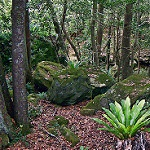

In [30]:
img_path = "/kaggle/input/intel-image-classification/seg_pred/seg_pred/10092.jpg"
imagee=Image.open(img_path)
imagee

In [31]:
def preprocess_images(img_path):
    img = image.load_img(img_path, target_size=(64, 64))

    img_array = image.img_to_array(img)

    img_array = np.expand_dims(img_array, axis=0)

    img_preprocessed = img_array / 255.0
    
    return img_preprocessed

In [32]:
loaded_model = tf.keras.models.load_model('/kaggle/working/path/to/save/model.h5')

def preprocess_images(path):
    img = load_img(path, target_size=(64, 64))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

img = preprocess_images(img_path)
prediction = loaded_model.predict(img)

predicted_class_index = np.argmax(prediction)
class_labels = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
predicted_class_label = class_labels[predicted_class_index]

print("Predicted class:", predicted_class_label)


1/1 [==============================] - 0s 149ms/step
Predicted class: forest
